# Logistic Regression

In [12]:
import numpy as np
import pandas as pd

In [2]:
heart_dataset = pd.read_csv('heart.csv')
heart_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
X = heart_dataset.drop(['output'], axis='columns')
y = heart_dataset.output
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [11]:
print(len(X_train))
print(len(X_test))

212
91


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

C:\Users\pelin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_predicted = model.predict(X_test)


In [16]:
model.score(X_test,y_test)

0.8021978021978022

In [18]:
model.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

array([1], dtype=int64)

# KNN

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [22]:
knn.score(X_test, y_test) #R^2 values

0.6229508196721312

In [23]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[14, 16],
       [ 7, 24]], dtype=int64)

Text(42.0, 0.5, 'Truth')

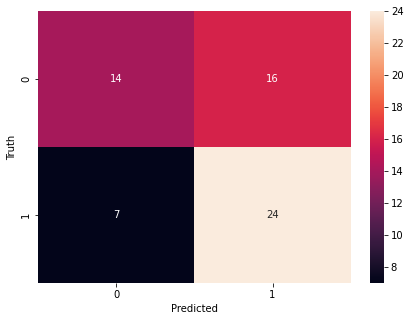

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5,6,7,8,9,10]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.694 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.612 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.646 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.812 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.694 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.612 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.625 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.812 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.625 total time=   0.0s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.633 total time=   0.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [34]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [35]:
grid_search.best_score_

0.6820578231292518

In [36]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.5737704918032787

In [37]:
heart_dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
heart_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Ensemble Learning


In [42]:
X = heart_dataset.drop("output",axis="columns")
y = heart_dataset.output

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.73770492, 0.83606557, 0.7704918 , 0.68333333, 0.68333333])

In [47]:
X_train.shape

(227, 13)

In [48]:
X_test.shape

(76, 13)

In [49]:
227+76

303

In [50]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=303, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7797356828193832

In [51]:
bag_model.score(X_test, y_test)

0.868421052631579

In [53]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()

0.8149726775956283